### Process of Harris Corner Detection Algorithm
1. Color to grayscale
2. Spatial derivative calculation
3. Structure tensor setup
4. Harris response calculation
5. Non-maximum suppression

#### Step 1 : Color to grayscale

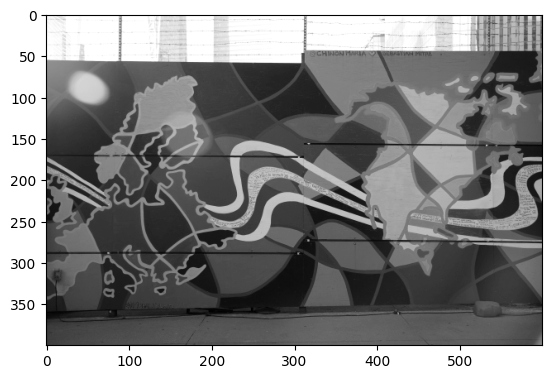

In [78]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.feature import corner_harris, corner_peaks
import cv2

img = imread('images/harris.JPG')
imggray = rgb2gray(img)
# imggray = cv2.resize(imggray, (256, 256))
plt.imshow(imggray, cmap="gray")
# plt.axis("off")
plt.show()

#### Step 2 : Spatial derivative calculation

In [79]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x, I_y = np.gradient(imggray)
# I_y = np.gradient_y(imggray)

#### Step 3 : Structure tensor setup

In [80]:
Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
Iyy = ndi.gaussian_filter(I_y**2, sigma=1)
window_size = 11
Ixx = cv2.boxFilter(Ixx, -1, (window_size, window_size))
Iyy = cv2.boxFilter(Iyy, -1, (window_size, window_size))
Ixy = cv2.boxFilter(Ixy, -1, (window_size, window_size))

#### Step 4: Harris response calculation

In [81]:
k = 0.2

# determinant
detA = Ixx * Iyy - Ixy ** 2
# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

# height, width = imggray.shape
# harris_response = []
# window_size = 6
# offset = int(window_size/2)
# for y in range(offset, height-offset):
#     for x in range(offset, width-offset):
#         Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
#         Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
#         Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        
#         #Find determinant and trace, use to get corner response
#         det = (Sxx * Syy) - (Sxy**2)
#         trace = Sxx + Syy
#         r = det - k*(trace**2)
        
#         harris_response.append(r)

#### Step 5: Non-maximum suppression
1. Edge : r < 0
2. Corner : r > 0
3. Flat: r = 0

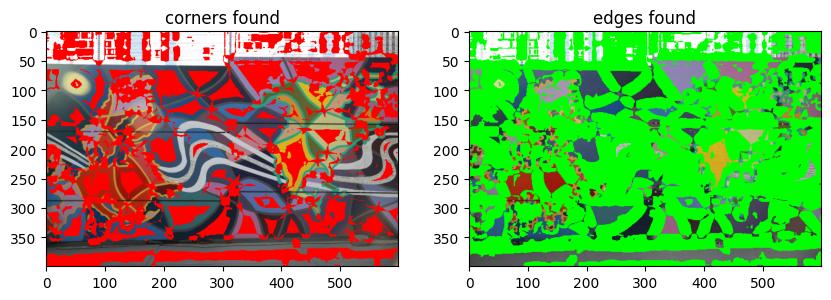

In [82]:
img_copy_for_corners = np.copy(img)
# img_copy_for_corners = cv2.resize(img_copy_for_corners, (256, 256))
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].set_title("corners found")
ax[0].imshow(img_copy_for_corners)
ax[1].set_title("edges found")
ax[1].imshow(img_copy_for_edges)
plt.show()

### Grouping the corners into one point
You can see there are multiple corners points found in the image, we need to find the local maxima of the corner points. there is a method in skimage which does a neat job in finding the peaks 

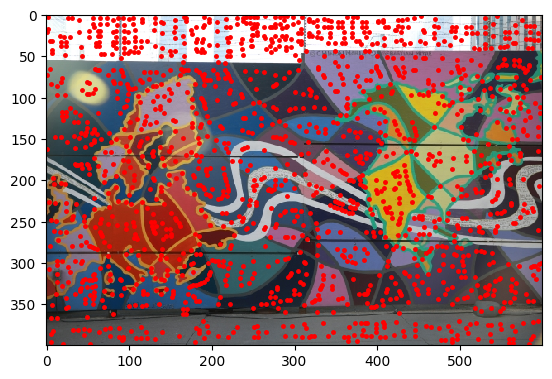

In [88]:
corners = corner_peaks(harris_response)
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=5)

In [13]:
#Harris corner detection using skimage library
from skimage.feature import corner_harris, corner_peaks
coords = corner_peaks(skimage_harris_response)

fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=3)

NameError: name 'skimage_harris_response' is not defined